# 第一題 [myknn_regressor]

In [3]:
import pickle
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

#Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

doscaling = 1

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

def standardization(data):
    mean = np.mean(data, axis = 0)
    sigma = np.std(data, axis = 0)
    return (data - mean)/sigma

## Q1.1 Create your myknn_regressor based on the skeleton.

In [4]:
class myknn_regressor():
    def __init__(self, n_neighbors = 10, mean_type = "equal_weight"):
        """mean_type can be equal_weight or remove_outliers.
                              equal_weight use the same weight for all neighbors.
                              remove_outliers remove neighbors out in [Q1 - 1.5 IQR, Q3 - 1.5IQR]."""
        self.k = n_neighbors
        self.option = mean_type

    def fit(self, x_train, y_train):
        #寫東西接住傳入值
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test):
        """use remove_outliers only if k>=10"""
        #計算在這裡
        ans = np.zeros(x_test.shape[0])
        
        if self.k < 10:
            self.option = "equal_weight"
                
        if self.option == "remove_outliers":
            q1 = np.quantile(self.y_train, 0.25)
            q3 = np.quantile(self.y_train, 0.75)
            IQR = q3 - q1
            l_bound = q1 - 1.5*IQR
            u_bound = q3 + 1.5*IQR
            self.x_train = self.x_train[np.where((l_bound < self.y_train ) & (u_bound > self.y_train ))]
            self.y_train = self.y_train[np.where((l_bound < self.y_train ) & (u_bound > self.y_train ))]
            
        for i in range(x_test.shape[0]):
            dist = np.sqrt(np.square(x_test[i] - self.x_train).sum(axis = 1))
            ans[i] = np.mean(self.y_train[np.argpartition(dist,self.k)[:self.k]]) #find the nearest k ones' indices
            
        return ans

## Q1.2 Make predictions using 𝑘=20 and "equal_weight".

In [4]:
myknn1 = myknn_regressor(20, "equal_weight")
myknn1.fit(standardization(X_train), Y_train)
ypred1 = myknn1.predict(standardization(X_test))

In [9]:
#List the first 20 predictions
print("List the first 20 predictions:")
print(ypred1[:20])

List the first 20 predictions:
[1992.9  1994.05 2000.05 1991.5  1992.8  1998.5  1987.1  1990.9  2001.8
 2003.   2001.15 1998.65 1995.55 1997.2  1995.05 1997.35 1992.15 1999.1
 2003.6  1995.75]


In [12]:
#RMSE
print("RMSE =",np.sqrt(np.square(ypred1 - Y_test).mean()))

RMSE = 10.292158827638316


## Q1.3 Make predictions using 𝑘=20 and "remove_outliers".

In [10]:
myknn2 = myknn_regressor(20, "remove_outliers")
myknn2.fit(standardization(X_train), Y_train)
ypred2 = myknn1.predict(standardization(X_test))

In [11]:
#List the first 20 predictions
print("List the first 20 predictions:")
print(ypred2[:20])

List the first 20 predictions:
[1992.9  1994.05 2000.05 1991.5  1992.8  1998.5  1987.1  1990.9  2001.8
 2003.   2001.15 1998.65 1995.55 1997.2  1995.05 1997.35 1992.15 1999.1
 2003.6  1995.75]


In [14]:
#RMSE
print("RMSE =", np.sqrt(np.square(ypred2 - Y_test).mean()))

RMSE = 10.292158827638316


# 第二題 [Tuning the Hyper-parameter]

In [7]:
import matplotlib.pyplot as plt
from sklearn import neighbors

𝑘_list = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]

#Case 1
err_case1 = []
for k in k_list:
    knn = neighbors.KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, Y_train)
    ypred3 = knn.predict(standardization(X_test))
    err_case1.append(np.sqrt(np.square(ypred3 - Y_test).mean()))

In [8]:
#Case 2
𝑘_list = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]
err_case2 = []
for k in k_list:
    knn = neighbors.KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, Y_train)
    ypred = knn.predict(X_test)
    err_case2.append(np.sqrt(np.square(ypred - Y_test).mean()))

In [9]:
#Case 3
𝑘_list = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]
err_case3 = []
for k in k_list:
    myknn = myknn_regressor(k, "remove_outliers")
    myknn.fit(standardization(X_train), Y_train)
    ypred = myknn.predict(standardization(X_test))
    err_case3.append(np.sqrt(np.square(ypred - Y_test).mean()))

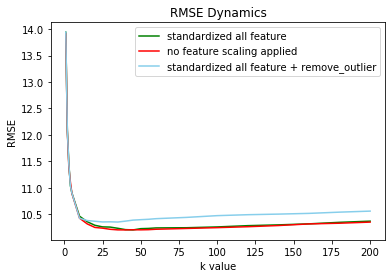

In [10]:
sub_axix = filter(lambda x:x%200 == 0, k_list)
plt.title('RMSE Dynamics')
plt.plot(k_list, err_case1, color='green', label='standardized all feature')
plt.plot(k_list, err_case2, color='red', label='no feature scaling applied')
plt.plot(k_list, err_case3,  color='skyblue', label='standardized all feature + remove_outlier')
plt.legend() # 显示图例

plt.xlabel('k value')
plt.ylabel('RMSE')
plt.show()

### Observation
- 由RMSE Dynamics的圖中可以發現三個不同的case在一開始時RMSE下降的速度非常接近
- case3較早開始回升，而且RMSE降低的幅度沒有case1和case2來得多
- case1和case2的曲線幾乎重合

# 第三題 [Lasso Regression]

- Q3.1 基於本題給的 𝐿 ，推導新的Coordinate Descent with Soft Thresholding公式

![title](IMG_3996.JPG)

In [17]:
#load the dataset, and create normalized and raw features. 
import pickle
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

#Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
#standardize feature values
X_train_sd = xscaler.transform(msd_data['X_train'])
X_test_sd = xscaler.transform(msd_data['X_test'])

#outcome values
Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

Q3.2 使用給定個骨架建構你的mylasso。

In [20]:
class mylasso():
    def __init__(self, lamcoef = 0.1, max_iter=1000, tol=1e-6, const_regu = False):
        """lamcoef: the regularization coefficient
           max_iter: maximum number of iteration for model training
           tol: tolerance for the stopping criteria for model training
           const_regu: whether the constant term should be regularized, default to False
           """
        self.lamcoef = lamcoef
        self.max_iter = max_iter
        self.tol = tol
        self.const_regu = const_regu

    def fit(self, x_train, y_train, winit = "ridge", keep_traindata = True, verbose = False):
        """Fit a Lasso model
           x_train: a numpy matrix that contains training features
           y_train: a numpy matrix that contains the label
           winit: how weights are initialized, default to "ridge", ridge regression
           keep_traindata: whether the object is going to keep training data after the training process completed
           verbose: output a lot of message"""
        m, n = x_train.shape
        X = np.hstack((np.ones((m,1)), x_train))
        y = y_train.reshape(-1,1)
        self.W = np.zeros((X.shape[1], 1))
        cost_history = np.zeros((self.max_iter, ))
        W_history = []
        if keep_traindata:
            self.x_train = x_train

        for i in range(1, len(cost_history)+1): #self.max_iter+1
            y_hat = X.dot(self.W)
            cost = np.square(y - y_hat).sum() / (2*m)

            if abs(cost_history[i-1]- cost) < self.tol:
                break
            else:
                gradient = self.compute_gradient(X, y_hat, y, m, self.const_regu).reshape(-1,1)
                cost_history[i-1] = cost
                W_history.append(self.W)
                self.W  -= 0.05 * gradient #不知道learning rate
        
        self.min_loss = cost_history.min()
        self.train_pred = X.dot(self.W) #這邊是最後的 不是最好的
        #np.argmin(cost_history) <-最好的w的index
        
        
    def sgn(self, W):
        W = np.where(W > 0, 1, 
                     (np.where(W < 0, -1, 0)))
        return W
        
    
    def compute_gradient(self, X, y_hat, y, m, const_regu):#公式對不對
        if const_regu == False:
            return 1/m * np.sum((y_hat - y) * X, axis=0) + self.lamcoef*(self.sgn(self.W)).reshape(1,-1) 
        else:
            return 1/m * np.sum((y_hat - y) * X, axis=0) + self.lamcoef*(self.sgn(self.W[0]) + self.sgn(self.W)).reshape(1,-1) 

    
    def predict(self, x_test):
        X = x_test
        m, n = X.shape
        X = np.hstack((np.ones((m, 1)), X))
        y_hat = X.dot(self.W)
        return y_hat

Q3.3 載入資料集，並且使用訓練資料計算Lasso Regression的權重，設定lamcoef = 0.1，其他參數使用預設值。列出Training Loss、Root Mean Squared Error (RMSE) in Training Data、Mean Absolute Error (MAE) in Training Data、Intercept (截距項)、Feature Weights (除了截距項的所有權重)、非零權重的個數。為了讓結果容易閱讀，請使用np.set_printoptions(suppress=True)關閉Scientific Notation。

In [21]:
np.set_printoptions(suppress=True)
mlo = mylasso()
mlo.fit(X_train_sd, Y_train)

train_pred = mlo.train_pred
RMSE = np.sqrt(np.mean(np.square(Y_train - train_pred)))
MAE = np.mean(abs(Y_train - train_pred))
training_loss = mlo.min_loss #不確定是哪個loss
non_zero_num = len(np.nonzero(mlo.W[1:])[0])
print(f'RMSE = {RMSE}')
print(f'MAE = {MAE}')
print(f'training_loss = {training_loss}')
print(f'intercept = {mlo.W[0]}')
print(f'weight = {mlo.W[1:]}')
print(f'number of non zero weights {non_zero_num}')

RMSE = 12.102274737051212
MAE = 9.086725755447883
training_loss = 47.23473711024125
intercept = [1998.166]
weight = [[ 4.65241098]
 [-2.45650915]
 [-1.06534361]
 [ 0.00067135]
 [-0.34169308]
 [-2.94209919]
 [-0.00013885]
 [-0.40041043]
 [-0.42643498]
 [-0.00047463]
 [-0.22969351]
 [-0.39654052]
 [ 0.50286075]
 [ 0.00166789]
 [-0.33859542]
 [ 0.62088177]
 [ 0.15602027]
 [ 0.42563494]
 [ 0.43586655]
 [ 1.12485047]
 [ 0.40789861]
 [ 0.00688091]
 [ 1.7659744 ]
 [ 0.00220918]
 [-0.16669758]
 [ 0.07675536]
 [ 0.66044016]
 [ 0.01263048]
 [ 0.15439551]
 [-0.00564649]
 [-0.21660202]
 [-0.22229231]
 [-0.00666151]
 [-0.00102963]
 [-0.01874009]
 [-0.26154533]
 [ 0.00257804]
 [ 0.29006884]
 [ 0.35020758]
 [-0.00006917]
 [-0.26028775]
 [-0.14444543]
 [-0.0098902 ]
 [ 0.03558603]
 [-0.04157684]
 [ 0.00668643]
 [ 0.00408633]
 [-0.17838952]
 [-0.00277578]
 [ 0.06505081]
 [ 0.27151831]
 [ 0.00268627]
 [ 0.00026057]
 [-0.00056869]
 [ 0.00215596]
 [ 0.003151  ]
 [-0.63594053]
 [ 0.23745533]
 [-0.19179962]

Q3.4 使用上一小題的模型計算測試資料的預測值。列出前五筆資料的預測年分、Test RMSE、Test MAE。  

In [22]:
#列出前五筆資料的預測年分、Test RMSE、Test MAE

test_pred = mlo.predict(X_test_sd)
RMSE = np.sqrt(np.mean(np.square(test_pred - Y_test)))
MAE = np.mean(abs(test_pred - Y_test))
print(f'列出前五筆資料的預測年分\n {test_pred[:5]}')
print(f'Test RMSE = {RMSE}')
print(f'Test MAE = {MAE}')

列出前五筆資料的預測年分
 [[1991.83211493]
 [1998.97508777]
 [2001.65510636]
 [1991.20394206]
 [1994.31129975]]
Test RMSE = 12.003828284390842
Test MAE = 8.956405674073867


Q3.5 使用下面的 λλ 訓練模型: 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2。  
記錄每一個 λλ 的Training Loss、Number of Nonzero Weights、Average Weight Size (Mean of Absolute Weight)、Training RMSE、  Test RMSE。將所有的結果列表、畫折線圖、並寫下你對結果的觀察。  

In [23]:
Lambda = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2]
collection = {}
collection['training_loss'] = []
collection['non_zero_num'] = []
collection['avg_w_size'] = []
collection['training_RMSE'] = []
collection['testing_RMSE'] = []

for l in Lambda:
    mlo = mylasso(lamcoef=l)
    mlo.fit(X_train_sd, Y_train)
    train_pred = mlo.train_pred
    test_pred = mlo.predict(X_test_sd)
    
    collection['training_loss'].append(mlo.min_loss) # 不確定
    collection['non_zero_num'].append(len(np.nonzero(mlo.W[1:])[0]))
    collection['avg_w_size'].append(np.mean(abs(mlo.W[1:])))
    collection['training_RMSE'].append(np.sqrt(np.mean(np.square(Y_train - train_pred))))
    collection['testing_RMSE'].append(np.sqrt(np.mean(np.square(Y_test - test_pred ))))
#     print(l)

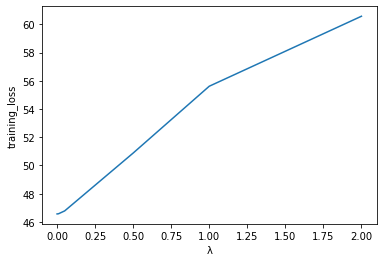

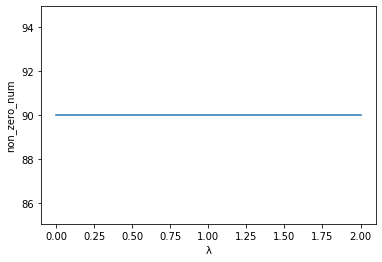

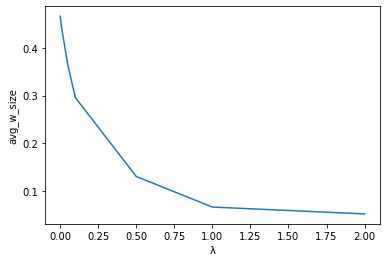

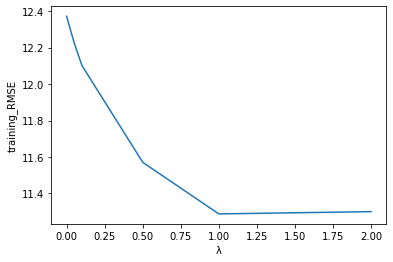

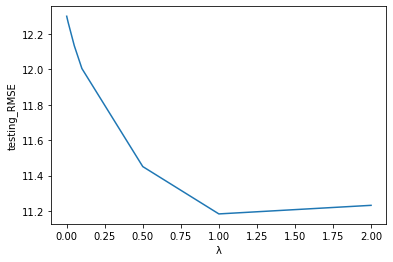

In [24]:
for key in list(collection.keys()):
    plt.plot(Lambda, collection[key])
    plt.xlabel('λ')
    plt.ylabel(key)
    plt.show()